In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
a = pd.DataFrame(pd.read_csv('97_1_Torr.csv', index_col=0))
a = a.reset_index().rename(columns={'t (s)': 't', 'V (mV)': 'a'})
a['a'] = a['a'].astype(float)
U_0_a = a.loc[0, 'a']
print(U_0_a)
a['a'] = np.log(U_0_a / a['a'])
print(a)

b = pd.DataFrame(pd.read_csv('82_2_Torr.csv', index_col=0))
b = b.reset_index().rename(columns={'t (s)': 't', 'V (mV)': 'b'})
b['b'] = b['b'].astype(float)
U_0_b = b.loc[0, 'b']
print(U_0_b)
b['b'] = np.log(U_0_b / b['b'])

print(b)

c = pd.DataFrame(pd.read_csv('61_6_Torr.csv', index_col=0))
c = c.reset_index().rename(columns={'t (s)': 't', 'V (mV)': 'c'})
c['c'] = c['c'].astype(float)
U_0_c = c.loc[0, 'c']
print(U_0_c)
c['c'] = np.log(U_0_c / c['c'])
print(c)

d = pd.DataFrame(pd.read_csv('44_82_Torr.csv', index_col=0))
d = d.reset_index().rename(columns={'t (s)': 't', 'V (mV)': 'd'})
d['d'] = d['d'].astype(float)
U_0_d = d.loc[0, 'd']
print(U_0_d)
d['d'] = np.log(U_0_d / d['d'])
print(d)

table_1 = pd.merge(a, b, on='t', how='outer')
table_2 = pd.merge(c, d, on='t', how='outer')
table = pd.merge(table_1, table_2, on='t', how='outer')
print(table)

13.4475
           t         a
0      0.000  0.000000
1      1.050  0.004920
2      2.100  0.005989
3      3.151  0.006670
4      4.159  0.008971
..       ...       ...
340  340.159  0.720810
341  341.159  0.723904
342  342.159  0.725254
343  343.160  0.728793
344  344.163  0.729656

[345 rows x 2 columns]
15.5699
           t         b
0      0.000  0.000000
1      1.050  0.003436
2      2.101  0.004945
3      3.111  0.007562
4      4.112  0.010433
..       ...       ...
266  266.112  0.706329
267  267.111  0.706277
268  268.111  0.709941
269  269.112  0.714222
270  270.111  0.714432

[271 rows x 2 columns]
16.6434
           t         c
0      0.000  0.000000
1      0.999  0.003394
2      1.999  0.007920
3      3.000  0.011366
4      3.999  0.014495
..       ...       ...
211  210.999  0.724964
212  212.000  0.731211
213  213.000  0.733648
214  214.000  0.736066
215  215.002  0.739106

[216 rows x 2 columns]
17.8978
           t         d
0      0.000  0.000000
1      0.969  0.005558

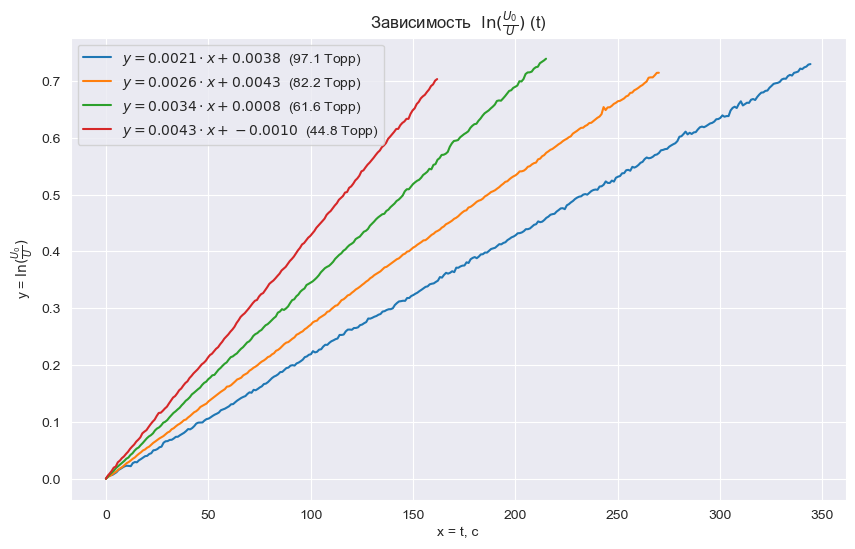

In [3]:
plt.figure(figsize=(10,6))

k_a, q_a = np.polyfit(a['t'], a['a'], deg = 1)
sns.lineplot(data=table, x='t', y='a', label='$y = %.4f\\cdot x + %.4f\ $ (97.1 Торр)' %(k_a, q_a))

k_b, q_b = np.polyfit(b['t'], b['b'], deg = 1)
sns.lineplot(data=table, x='t', y='b', label='$y = %.4f\\cdot x + %.4f\ $ (82.2 Торр)' %(k_b, q_b))

k_c, q_c = np.polyfit(c['t'], c['c'], deg = 1)
sns.lineplot(data=table, x='t', y='c', label='$y = %.4f\\cdot x + %.4f\ $ (61.6 Торр)' %(k_c, q_c))

k_d, q_d = np.polyfit(d['t'], d['d'], deg = 1)
sns.lineplot(data=table, x='t', y='d', label='$y = %.4f\\cdot x + %.4f\ $ (44.8 Торр)' %(k_d, q_d))

plt.title('Зависимость $\ \ln(\\frac{U_0}{U})$ (t)')
plt.ylabel('y = $\ln(\\frac{U_0}{U})$')
plt.xlabel('x = t, c')

plt.legend()

plt.savefig('saved_figure.png')
plt.show()